# K-Means

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

### Create a KMeans Class

In [ ]:
class KMeansClustering:
    def __init__(self,k=3): #default k set to 3 when making a KMeansClustering instance
        self.k = k 
        self.centeroids = None

    def fit(self,X,max_iter=100,method="euclidean"):
        self.method = method
        #Initialize centroids with random data points
        self.centeroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        #adjusting the centroids
        for _ in range(max_iter):
            y=[]

            #find closest points 
            for data_point in X:
                #Here we use euclidean method by default, has the flexibility to use manhattan distance
                distances = self._calc_distance(data_point,self.centeroids,self.method)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)
            
            y = np.array(y)

            #get the corresponding indices of cluster found
            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y==i))

            #update the cluster center with the mean point of data present in that cluster
            new_cluster_centers = []

            for i, indices in enumerate(cluster_indices):
                if len(indices)==0:
                    new_cluster_centers.append(self.centeroids[i])
                else:
                    new_cluster_centers.append(np.mean(X[indices],axis=0)[0])
            
            #stopping criteria for clustering
            if np.max(self.centeroids - np.array(new_cluster_centers)) < 0.0001:
                break
            else:
                self.centeroids = np.array(new_cluster_centers)

        return y
    
    def _calc_distance(self,data_points,centroids,method):
        if method=="manhattan":
            return np.abs(np.sum((data_points-centroids)**2,axis=1))
        
        return np.sqrt(np.sum((data_points-centroids)**2,axis=1))
    

### Testing

Generate new dataset from make_blobs presetn in sklearn package to generate data to be clustered with the choice of centers

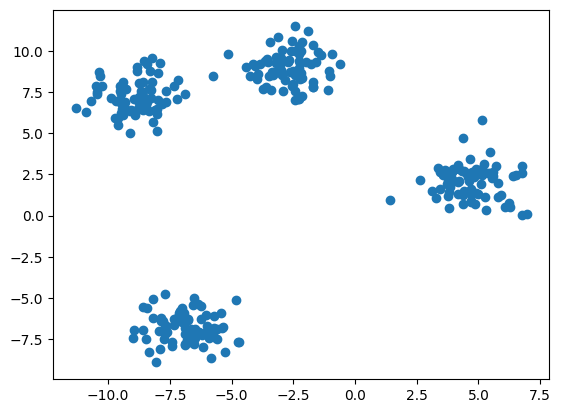

In [ ]:
from sklearn.datasets import make_blobs


data = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42)
random_points = data[0]

#Visualize the data
plt.scatter(random_points[:,0],random_points[:,1])
plt.xlabel("X1")
plt.label("X2")
plt.title("Data Visualization")
plt.show()

#### Run the Kmeans algorithm

In [ ]:
kmeans = KMeansClustering(4)
labels = kmeans.fit(random_points)

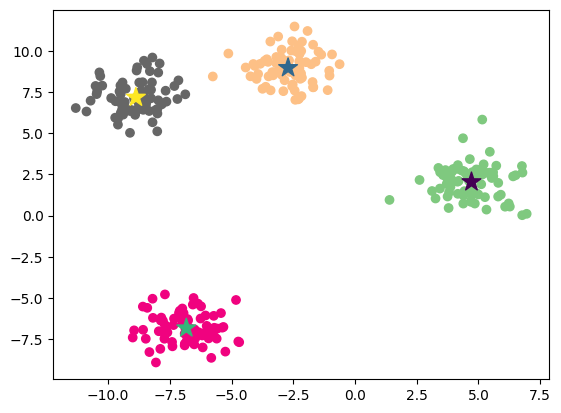

In [ ]:
#Visualize the clusters

plt.scatter(random_points[:,0],random_points[:,1],c=labels,cmap='Accent')
plt.scatter(kmeans.centeroids[:,0],kmeans.centeroids[:,1],s=200,c=range(len(kmeans.centeroids)),marker="*")
plt.xlabel("X1")
plt.label("X2")
plt.title("Data Visualization by Cluster")
plt.show()

#### Finding optimal K

Using elbow method to check for the optimum number of clusters required to seperate the data

Text(0, 0.5, 'Sum of Squared Error')

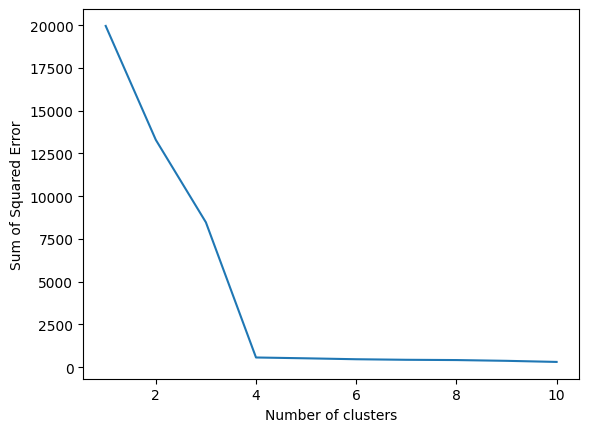

In [ ]:

k_max=10
sse=[]
for k in range(1,k_max+1):
    kmeans = KMeansClustering(k)
    pred_clusters = kmeans.fit(random_points)
    centroids = kmeans.centeroids
    curr_sse=0
    
    for i in range(len(random_points)):
        curr_center = centroids[pred_clusters[i]]
        curr_sse += (random_points[i,0]-curr_center[0])**2 + (random_points[i,1]-curr_center[1])**2

    sse.append(curr_sse)

#Visualize the errors and number of clusters
plt.plot([i for i in range(1,k_max+1)],sse)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Error")
plt.title("Error v/s # cluster")